In [2]:
from em_code import *
import matplotlib.pyplot as plt

nClusters = 5
nStates=3 
tt,qq=generateChains(nStates, nClusters) # randomly generate chain
mixtureProbs = np.repeat(1/nClusters, nClusters) # uniform for now


In [3]:
N=50 # num trajectories 
T=250 # num time pts 
Xt, trueLabels = generateTrajectories(N,T, mixtureProbs, qq,tt, nClusters) # sample


In [16]:
tol=1e-12 # EM stopping tolerance
zHat, muHat, qHat, pHat, steps = doEM(Xt, nClusters, nStates, tol) 

In [17]:
best_assignment, zHat_c, qHat_c, muHat_c, pHat_c = find_best_clustermatch(trueLabels, zHat, muHat, qHat, pHat)  # uses HUNGARIAN ALGORITHM to assign best permutation

In [18]:
best_assignment

array([3, 4, 1, 2, 0], dtype=int64)

In [19]:
zHatTrue = make_zHatTrue(trueLabels,nClusters) # make true labels into an N x nCluster matrix

In [20]:
# compare to this to brute force, every permutation of Ztrue vs Zhat
from itertools import permutations
permlist = list(permutations(range(0,nClusters)))

In [21]:
permErrs = np.zeros(len(permlist))
for p in range(len(permlist)):
    this_p = np.array(permlist[p])
    zHat_p = np.zeros(np.shape(zHat))
    for c in range(nClusters):
        zHat_p[:,c] = zHat[:,this_p[c]]
    permErrs[p] = np.linalg.norm(zHat_p-zHatTrue,ord=1)    



In [22]:
bestperm_brute = permlist[np.argmin(permErrs)]

In [23]:
bestperm_brute # please be the same... it is!

(3, 4, 1, 2, 0)

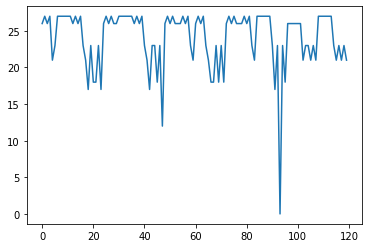

In [24]:
plt.plot(permErrs)  #  hopefully there is one clear winner... and there is!